In [2]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# reading raw data file
data_train = pd.read_csv('Archivos_CSV_con_etiquetas/train_tortuga.csv')
data_train = data_train.drop(['gx','gy','gz'], axis=1)


# removing null values
data_train = data_train.dropna()
data_train.shape

# drop the rows where timestamp is 0
df = data_train[pd.to_datetime(data_train['dateTime_UTC']) != 0]

# now arrange data in ascending order of the user and timestamp
df = df.sort_values(by = ['dateTime_UTC'], ignore_index=True)


In [3]:
window_size = 578
step_size = 289

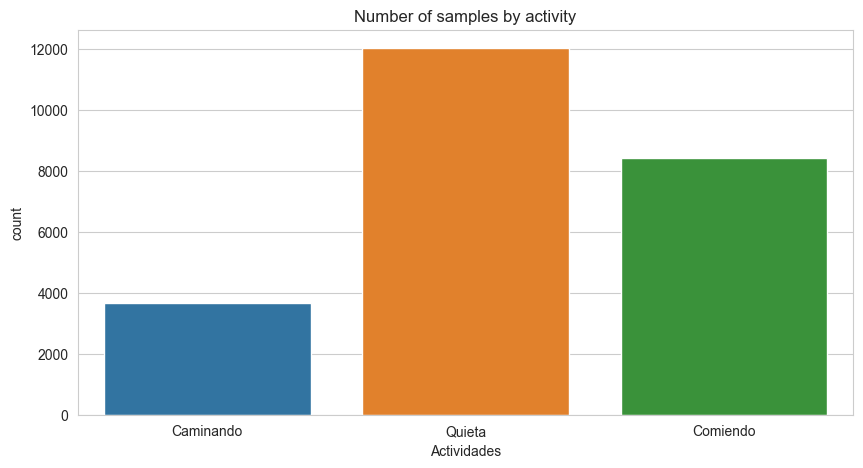

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Actividades', data = df)
plt.title('Number of samples by activity')
plt.show()

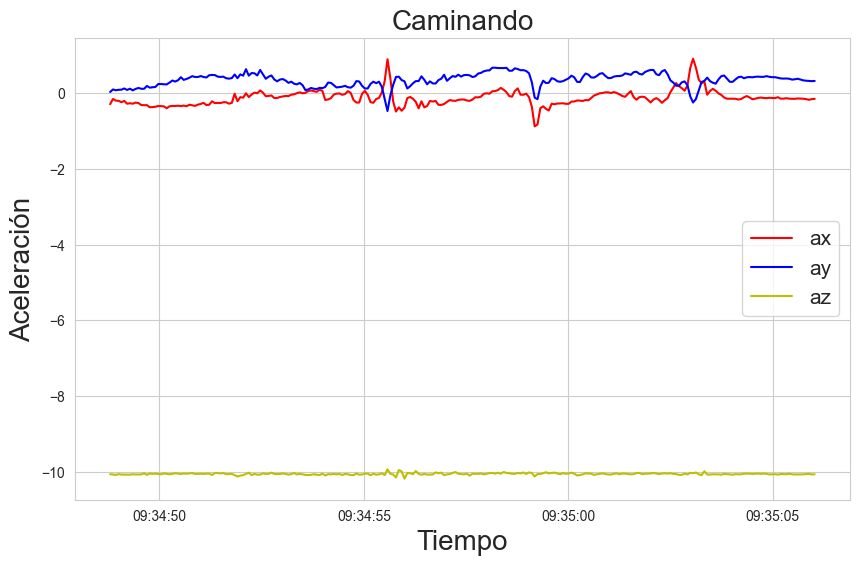

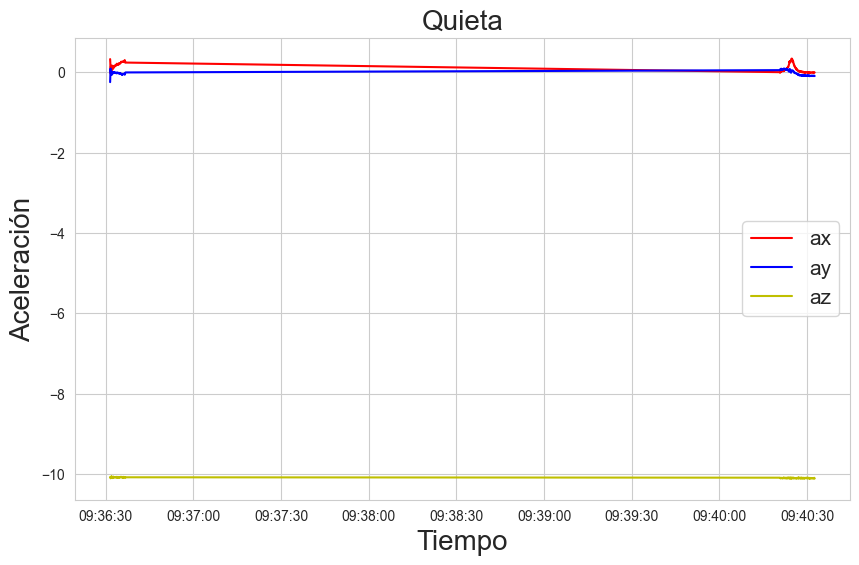

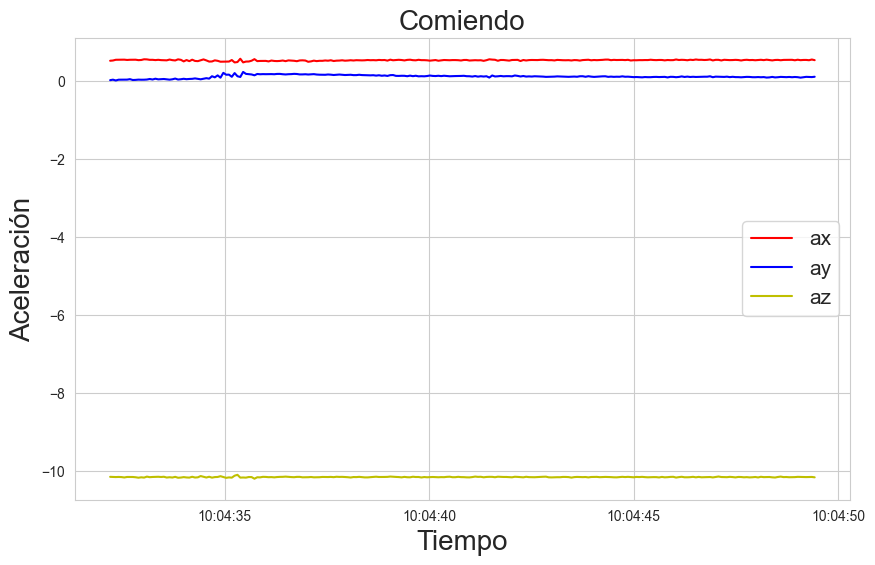

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for i in ['Caminando', 'Quieta', 'Comiendo']:
    data_ = df[(df['Actividades'] == i)][:250]
    plt.figure(figsize=(10, 6))

    # Crear las líneas con etiquetas
    sns.lineplot(y='ax', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='r', label='ax')
    sns.lineplot(y='ay', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='b', label='ay')
    sns.lineplot(y='az', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='y', label='az')

    # Añadir leyenda automáticamente
    plt.legend(fontsize=15)

    # Etiquetas y título
    plt.ylabel('Aceleración', fontsize=20)
    plt.xlabel('Tiempo', fontsize=20)
    plt.title(i, fontsize=20)

    # Mostrar gráfica
    plt.show()

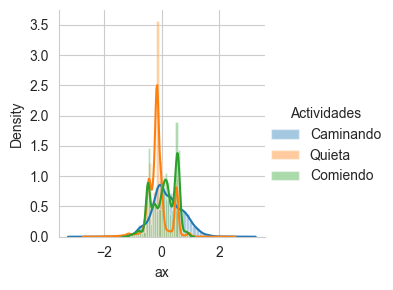

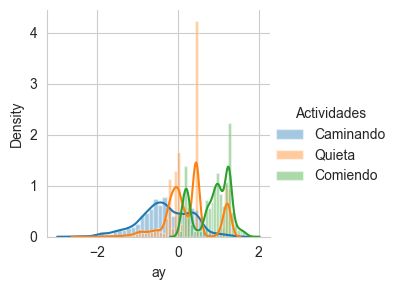

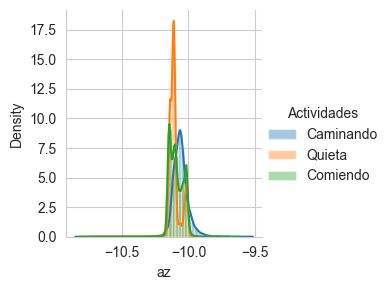

In [6]:
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'ax').add_legend()
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'ay').add_legend()
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'az').add_legend()

In [7]:
df_train = data_train

In [8]:
x_list_train = []
y_list_train = []
z_list_train = []
train_labels = []

# creating overlaping windows of size window-size
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['ax'].values[i: i + window_size]
    ys = df_train['ay'].values[i: i + window_size]
    zs = df_train['az'].values[i: i + window_size]
    label = stats.mode(df_train['Actividades'][i: i + window_size])[0][0]

    x_list_train.append(xs)
    y_list_train.append(ys)
    z_list_train.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list_train).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list_train).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list_train).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list_train).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list_train).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list_train).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list_train).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list_train).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list_train).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list_train).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list_train).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list_train).apply(lambda x: x.max())

# # max-min diff
# X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
# X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
# X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list_train).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list_train).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list_train).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list_train).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list_train).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list_train).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list_train).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list_train).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list_train).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list_train).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list_train).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list_train).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list_train).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list_train).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list_train).apply(lambda x: len(find_peaks(x)[0]))

# # skewness
# X_train['x_skewness'] = pd.Series(x_list_train).apply(lambda x: stats.skew(x))
# X_train['y_skewness'] = pd.Series(y_list_train).apply(lambda x: stats.skew(x))
# X_train['z_skewness'] = pd.Series(z_list_train).apply(lambda x: stats.skew(x))

# # kurtosis
# X_train['x_kurtosis'] = pd.Series(x_list_train).apply(lambda x: stats.kurtosis(x))
# X_train['y_kurtosis'] = pd.Series(y_list_train).apply(lambda x: stats.kurtosis(x))
# X_train['z_kurtosis'] = pd.Series(z_list_train).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list_train).apply(lambda x: np.sum(x**2)/window_size)
X_train['y_energy'] = pd.Series(y_list_train).apply(lambda x: np.sum(x**2)/window_size)
X_train['z_energy'] = pd.Series(z_list_train).apply(lambda x: np.sum(x**2)/window_size)

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_train)**2 + pd.Series(y_list_train)**2 + pd.Series(z_list_train)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list_train).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_train).apply(lambda x: np.sum(abs(x)/window_size)) \
                  + pd.Series(z_list_train).apply(lambda x: np.sum(abs(x)/window_size))

# Test

In [9]:
# reading raw data file
data_test = pd.read_csv('Archivos_CSV_con_etiquetas/test_tortuga.csv')
data_test = data_test.drop(['gx','gy','gz'], axis=1)


# removing null values
data_test = data_test.dropna()
data_test.shape

# drop the rows where timestamp is 0
df_test = data_test[pd.to_datetime(data_test['dateTime_UTC']) != 0]

# now arrange data in ascending order of the user and timestamp
df_test = df_test.sort_values(by = ['dateTime_UTC'], ignore_index=True)

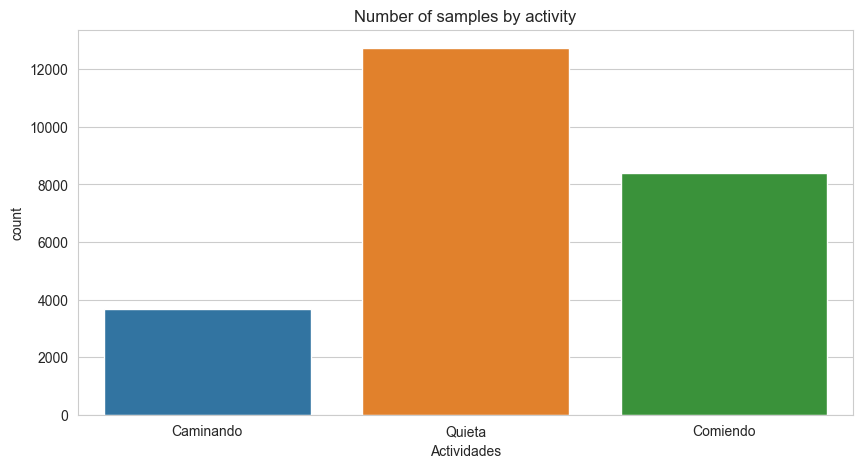

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Actividades', data = df_test)
plt.title('Number of samples by activity')
plt.show()

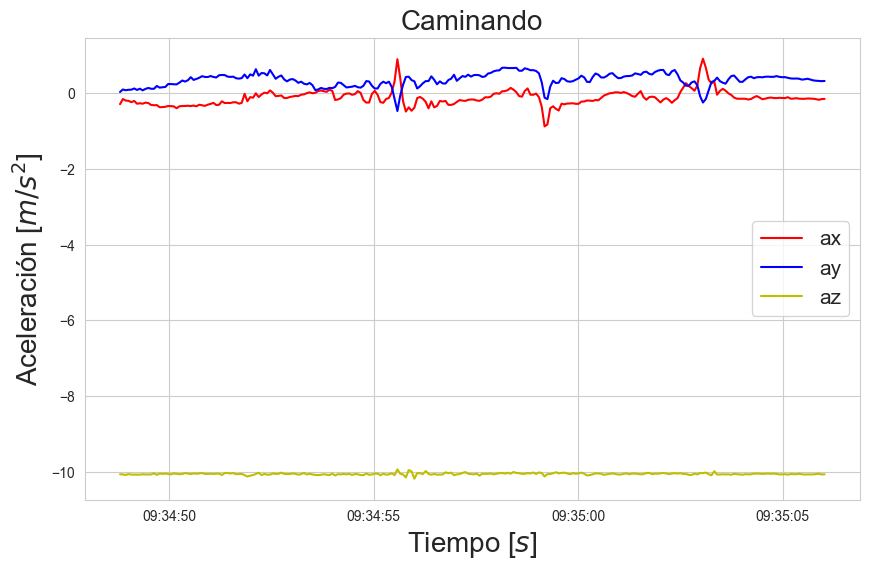

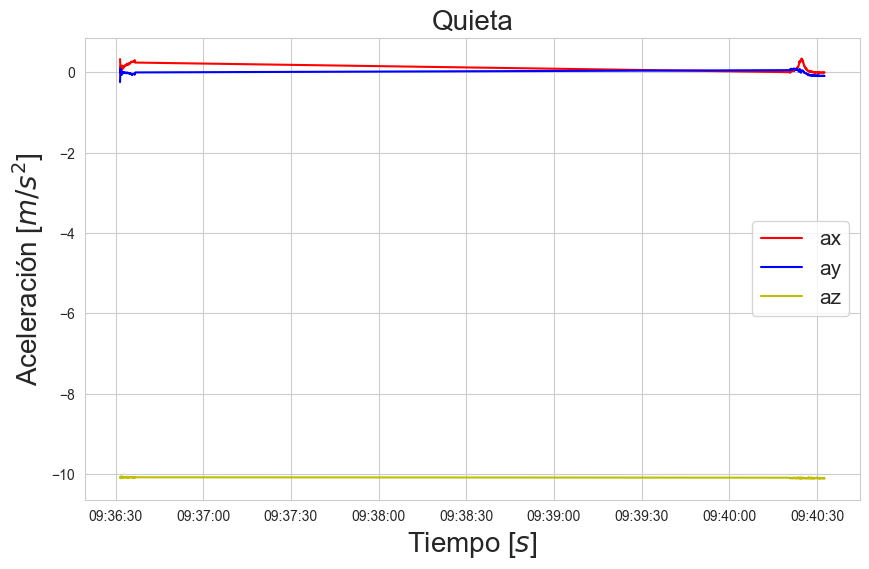

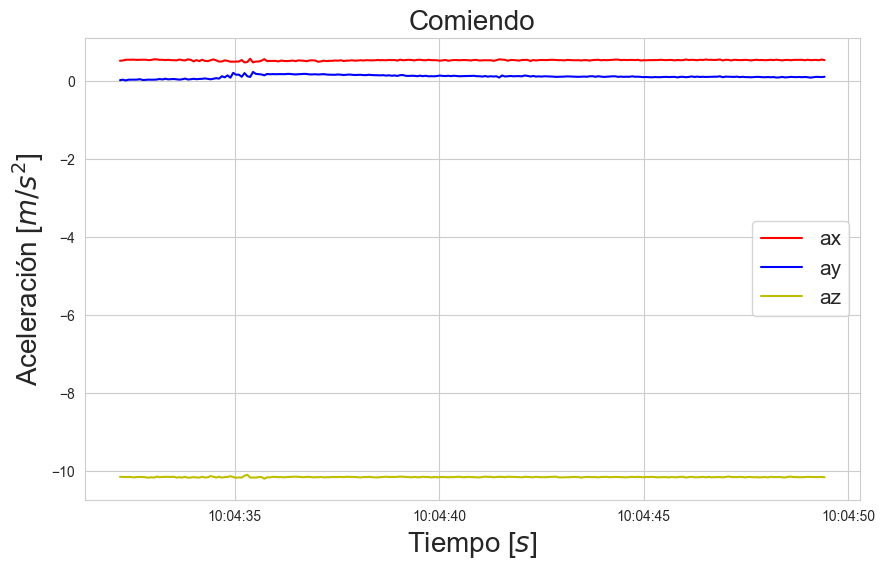

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for i in ['Caminando', 'Quieta', 'Comiendo']:
    data_ = df[(df['Actividades'] == i)][:250]
    plt.figure(figsize=(10, 6))

    # Crear las líneas con etiquetas
    sns.lineplot(y='ax', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='r', label='ax')
    sns.lineplot(y='ay', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='b', label='ay')
    sns.lineplot(y='az', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='y', label='az')

    # Añadir leyenda automáticamente
    plt.legend(fontsize=15)

    # Etiquetas y título
    plt.ylabel('Aceleración [$m/s^2$]', fontsize=20)
    plt.xlabel('Tiempo [$s$]', fontsize=20)
    plt.title(i, fontsize=20)
    

    # Mostrar gráfica
    plt.show()

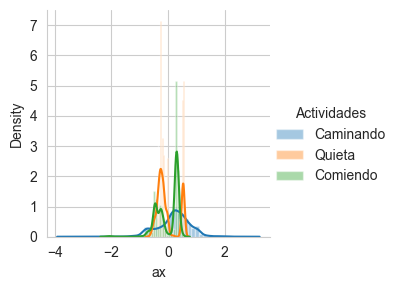

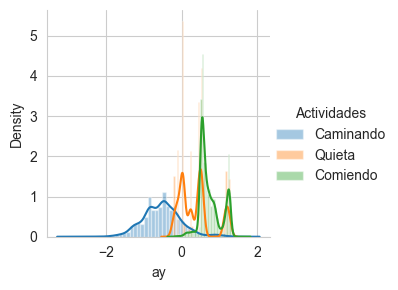

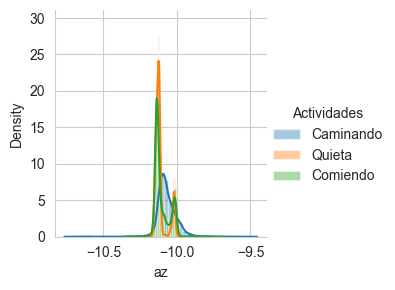

In [12]:
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'ax').add_legend()
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'ay').add_legend()
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'az').add_legend()

In [13]:
x_list_test = []
y_list_test = []
z_list_test = []
test_labels = []



# creating overlaping windows of size window-size
for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['ax'].values[i: i + window_size]
    ys = df_test['ay'].values[i: i + window_size]
    zs = df_test['az'].values[i: i + window_size]
    label = stats.mode(df_test['Actividades'][i: i + window_size])[0][0]

    x_list_test.append(xs)
    y_list_test.append(ys)
    z_list_test.append(zs)
    test_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

# mean
X_test['x_mean'] = pd.Series(x_list_test).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list_test).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list_test).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list_test).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list_test).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list_test).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list_test).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list_test).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list_test).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list_test).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list_test).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list_test).apply(lambda x: x.max())

# #max-min diff
# X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
# X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
# X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list_test).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list_test).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list_test).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list_test).apply(lambda x: len(find_peaks(x)[0]))

# # skewness
# X_test['x_skewness'] = pd.Series(x_list_test).apply(lambda x: stats.skew(x))
# X_test['y_skewness'] = pd.Series(y_list_test).apply(lambda x: stats.skew(x))
# X_test['z_skewness'] = pd.Series(z_list_test).apply(lambda x: stats.skew(x))

# # kurtosis
# X_test['x_kurtosis'] = pd.Series(x_list_test).apply(lambda x: stats.kurtosis(x))
# X_test['y_kurtosis'] = pd.Series(y_list_test).apply(lambda x: stats.kurtosis(x))
# X_test['z_kurtosis'] = pd.Series(z_list_test).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list_test).apply(lambda x: np.sum(x**2)/window_size)
X_test['y_energy'] = pd.Series(y_list_test).apply(lambda x: np.sum(x**2)/window_size)
X_test['z_energy'] = pd.Series(z_list_test).apply(lambda x: np.sum(x**2)/window_size)

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_test)**2 + pd.Series(y_list_test)**2 + pd.Series(z_list_test)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list_test).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_test).apply(lambda x: np.sum(abs(x)/window_size)) \
                  + pd.Series(z_list_test).apply(lambda x: np.sum(abs(x)/window_size))

In [14]:
act = np.array(train_labels)
act_test = np.array(test_labels)

### Regresión lineal

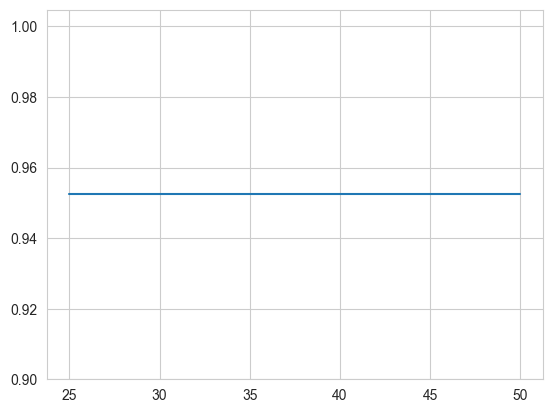

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
exactitud=[]
i=25
while i<50:
    # standardization
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_data_lr = scaler.transform(X_train)
    X_test_data_lr = scaler.transform(X_test)
    # logistic regression model
    lr = LogisticRegression(C=40,random_state = 21)
    lr.fit(X_train_data_lr, act)
    act_pred = lr.predict(X_test_data_lr)
    exactitud.append(accuracy_score(act_test, act_pred))
    i+=1

x=np.linspace(25,50,25)
plt.plot(x,exactitud)   
    

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(C=40,random_state = 21)
lr.fit(X_train_data_lr, act)
act_pred = lr.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(act_test, act_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(act_test,act_pred))

Accuracy: 0.9523809523809523

 -------------Classification Report-------------

              precision    recall  f1-score   support

   Caminando       1.00      0.92      0.96        12
    Comiendo       0.94      0.97      0.95        31
      Quieta       0.95      0.95      0.95        41

    accuracy                           0.95        84
   macro avg       0.96      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



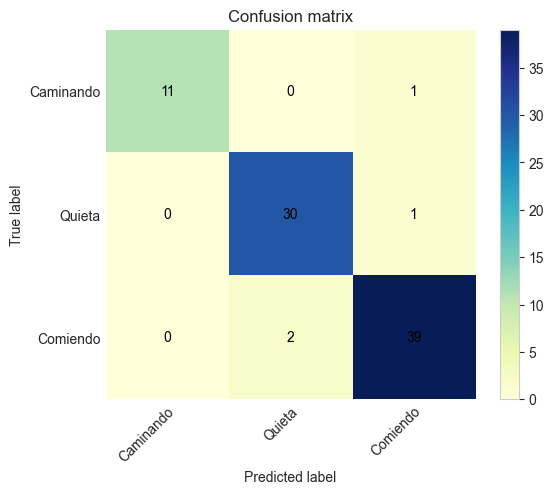

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# Generar la matriz de confusión
confusion_matrix = confusion_matrix(act_test, act_pred)

# Etiquetas de las clases
labels = ['Caminando', 'Quieta', 'Comiendo']

# Crear figura y ejes
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='YlGnBu')  # Cambiar el colormap aquí

# Mostrar todas las etiquetas de las clases
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotar las etiquetas para que sean legibles
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar los valores de cada celda
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

# Configuración del título y etiquetas de los ejes
plt.title("Confusion matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Agregar la barra de referencia al lado
plt.colorbar(im, ax=ax)

# Eliminar las líneas divisorias entre los cuadrados
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
ax.grid(False)
plt.show()


### Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd


# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_rf = scaler.transform(X_train)
X_test_data_rf = scaler.transform(X_test)


#Entrenar el modelo
modeloX = RandomForestClassifier(random_state=21)
modeloX.fit(X_train_data_rf, act)

#Evaluar el modelo
act_pred_rf = modeloX.predict(X_test_data_rf)
accuracyX = accuracy_score(act_test, act_pred)
precision_recall_fscore = precision_recall_fscore_support(act_test,act_pred_rf,average=None)

print("Accuracy del modelo en X:", accuracyX)
print(classification_report(act_test,act_pred))


Accuracy del modelo en X: 0.9523809523809523
              precision    recall  f1-score   support

   Caminando       1.00      0.92      0.96        12
    Comiendo       0.94      0.97      0.95        31
      Quieta       0.95      0.95      0.95        41

    accuracy                           0.95        84
   macro avg       0.96      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



In [19]:
print(modeloX.feature_importances_)

[0.02174078 0.06326717 0.03599397 0.03241839 0.02604091 0.0313516
 0.01849061 0.00903413 0.02266243 0.01068385 0.05507436 0.01898076
 0.03623573 0.05113509 0.02634218 0.03442859 0.03956044 0.04089928
 0.01674585 0.02632194 0.01483773 0.01579471 0.01632825 0.01668854
 0.02267124 0.02163911 0.         0.02512669 0.03521016 0.
 0.00527142 0.00507657 0.0134459  0.02880899 0.02302346 0.00565167
 0.01061112 0.04062413 0.02092353 0.027687   0.03317173]


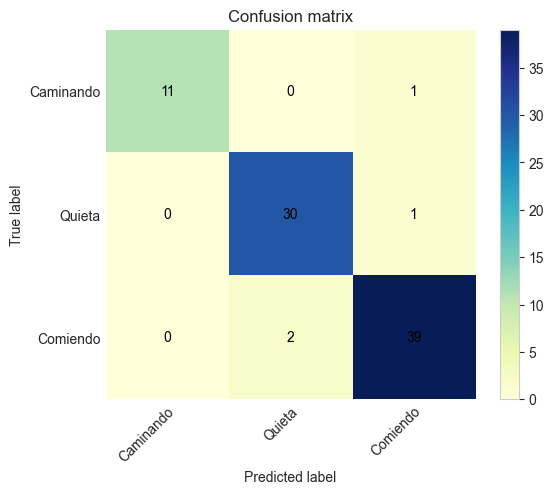

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


labels = ['Caminando', 'Quieta', 'Comiendo']

# Generar la matriz de confusión
confusion_matrix = confusion_matrix(act_test, act_pred)

# Crear figura y ejes
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='YlGnBu')  # Cambiar el colormap aquí

# Mostrar todas las etiquetas de las clases
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotar las etiquetas para que sean legibles
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar los valores de cada celda
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

# Configuración del título y etiquetas de los ejes
plt.title("Confusion matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Agregar la barra de referencia al lado
plt.colorbar(im, ax=ax)

# Eliminar las líneas divisorias entre los cuadrados
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
ax.grid(False)
plt.show()

In [22]:
%matplotlib qt
import math
colors=[]
for i in range(len(act_pred)):
    if act_pred[i]==labels[0]:
        colors.append('red')
    if act_pred[i]==labels[1]:
        colors.append('blue')
    if act_pred[i]==labels[2]:
        colors.append('gray')
colors_par = colors[::2]
colors_impar = colors[1::2]


colores_verdaderos = []
for i in range(len(df_test['Actividades'])):
    if df_test['Actividades'][i]==labels[0]:
        colores_verdaderos.append('red')
    if df_test['Actividades'][i]==labels[1]:
        colores_verdaderos.append('blue')
    if df_test['Actividades'][i]==labels[2]:
        colores_verdaderos.append('gray')


fig, (ax1,ax2) = plt.subplots(2,1)
eje_x=[]
size=5
i=0
print(window_size*len(colors_par))
while i <window_size*len(colors_par):
    if i<window_size/2:
        ax1.scatter(i/51,df_test['ax'][i],color=colors_par[int(math.floor(i/window_size))],s=size)
    if i>window_size/2 and int(math.floor(i/window_size))<len(colors_par) and i<window_size*len(colors_par):
        if colors_par[int(math.floor(i/window_size))] == colors_impar[int(math.floor(i/window_size))]:
            ax1.scatter(i/51,df_test['ax'][i],color=colors_par[int(math.floor(i/window_size))],s=size)
        else:
            ax1.scatter(i/51,df_test['ax'][i]+0.05,color=colors_par[int(math.floor(i/window_size))],s=size)
            ax1.scatter(i/51,df_test['ax'][i]-0.05,color=colors_impar[int(math.floor(i/window_size))],s=size)
    if i>window_size*len(colors_par):
        ax1.scatter(i/51,df_test['ax'][i],color=colors_impar[int(math.floor(i/window_size))],s=size)
    ax2.scatter(i/51,df_test['ax'][i], color=colores_verdaderos[i], s=size)
    print(i)
    i+=14
ax1.set_title('Predicciones', fontsize=14)
ax1.set_ylabel('ax [$m/s^2$]', fontsize=14)
ax2.set_title('Actividades reales', fontsize=14)
ax2.set_xlabel('Tiempo [s]',fontsize=14)
ax2.set_ylabel('ax [$m/s^2$]', fontsize=14)
plt.show()

24276
0
14
28
42
56
70
84
98
112
126
140
154
168
182
196
210
224
238
252
266
280
294
308
322
336
350
364
378
392
406
420
434
448
462
476
490
504
518
532
546
560
574
588
602
616
630
644
658
672
686
700
714
728
742
756
770
784
798
812
826
840
854
868
882
896
910
924
938
952
966
980
994
1008
1022
1036
1050
1064
1078
1092
1106
1120
1134
1148
1162
1176
1190
1204
1218
1232
1246
1260
1274


1288
1302
1316
1330
1344
1358
1372
1386
1400
1414
1428
1442
1456
1470
1484
1498
1512
1526
1540
1554
1568
1582
1596
1610
1624
1638
1652
1666
1680
1694
1708
1722
1736
1750
1764
1778
1792
1806
1820
1834
1848
1862
1876
1890
1904
1918
1932
1946
1960
1974
1988
2002
2016
2030
2044
2058
2072
2086
2100
2114
2128
2142
2156
2170
2184
2198
2212
2226
2240
2254
2268
2282
2296
2310
2324
2338
2352
2366
2380
2394
2408
2422
2436
2450
2464
2478
2492
2506
2520
2534
2548
2562
2576
2590
2604
2618
2632
2646
2660
2674
2688
2702
2716
2730
2744
2758
2772
2786
2800
2814
2828
2842
2856
2870
2884
2898
2912
2926
2940
2954
2968
2982
2996
3010
3024
3038
3052
3066
3080
3094
3108
3122
3136
3150
3164
3178
3192
3206
3220
3234
3248
3262
3276
3290
3304
3318
3332
3346
3360
3374
3388
3402
3416
3430
3444
3458
3472
3486
3500
3514
3528
3542
3556
3570
3584
3598
3612
3626
3640
3654
3668
3682
3696
3710
3724
3738
3752
3766
3780
3794
3808
3822
3836
3850
3864
3878
3892
3906
3920
3934
3948
3962
3976
3990
4004
4018
4032
4046
4060
4074
